In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import platform

In [41]:
from matplotlib import font_manager, rc

%matplotlib inline

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

##### utf 파일이지만, 바이트가 맞지 않을 때, cp949 or euc-kr 

In [8]:
crime=pd.read_csv('C:/Users/ASIA-/00.sb/seoul_crime_2015.csv', encoding='cp949')    # utf파일 이지만, 바이트가 안맞음
crime.head(3)

,관서명,살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거)
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794


In [9]:
crime.info()  # 나중에 object를 int 로 바꿔야함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인(발생)  31 non-null     int64 
 2   살인(검거)  31 non-null     int64 
 3   강도(발생)  31 non-null     int64 
 4   강도(검거)  31 non-null     int64 
 5   강간(발생)  31 non-null     int64 
 6   강간(검거)  31 non-null     int64 
 7   절도(발생)  31 non-null     object
 8   절도(검거)  31 non-null     object
 9   폭력(발생)  31 non-null     object
 10  폭력(검거)  31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


#### 각 경찰서별 발생한 범죄발생, 범죄검거의 추가적인  컬럼을 만든다. '소계(발생)'= 범죄 발생합, '소계(검거)'= 범죄 검거합

#### 숫자에 있는 ',' 없애는 방법

In [16]:
for tuple in crime.values:
    for ele in tuple[-1:-4:-1]:
        str(ele).replace(',','')
textData = crime[crime.columns[-4:]].values
for idx,row in enumerate(textData):
    for idx2,ele in enumerate(row):
        textData[idx][idx2]= int(str(ele).replace(',',''))
textData
crime[crime.columns[-4:]] = textData
crime.head(3)

,관서명,살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거)
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794


In [17]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인(발생)  31 non-null     int64 
 2   살인(검거)  31 non-null     int64 
 3   강도(발생)  31 non-null     int64 
 4   강도(검거)  31 non-null     int64 
 5   강간(발생)  31 non-null     int64 
 6   강간(검거)  31 non-null     int64 
 7   절도(발생)  31 non-null     int64 
 8   절도(검거)  31 non-null     int64 
 9   폭력(발생)  31 non-null     int64 
 10  폭력(검거)  31 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.8+ KB


In [19]:
crime['소계(발생)']= crime['살인(발생)']+crime['강도(발생)']+crime['강간(발생)']+crime['절도(발생)']+crime['폭력(발생)']
crime['소계(검거)']= crime['살인(검거)']+crime['강도(검거)']+crime['강간(검거)']+crime['절도(검거)']+crime['폭력(검거)']

In [20]:
crime.head(3)

,관서명,살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),소계(발생),소계(검거)
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,2860,1716
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,2472,1589
2,남대문서,1,0,6,4,65,46,1153,382,869,794,2094,1226


In [21]:
crime2=crime.copy()
crime=crime2.copy()

In [ ]:
crime['관서명'].

### 경찰서가 위치한 '구'에 대한 mapping

In [23]:
police={'서대문서': '서대문구', '수서서': '강남구', '강서서': '강서구', '서초서': '서초구',
                '서부서': '은평구', '중부서': '중구', '종로서': '종로구', '남대문서': '중구',
                '혜화서': '종로구', '용산서': '용산구', '성북서': '성북구', '동대문서': '동대문구',
                '마포서': '마포구', '영등포서': '영등포구', '성동서': '성동구', '동작서': '동작구',
                '광진서': '광진구', '강북서': '강북구', '금천서': '금천구', '중랑서': '중랑구',
                '강남서': '강남구', '관악서': '관악구', '강동서': '강동구', '종암서': '성북구', 
                '구로서': '구로구', '양천서': '양천구', '송파서': '송파구', '노원서': '노원구', 
                '방배서': '서초구', '은평서': '은평구', '도봉서': '도봉구'}
crime['구별'] = crime['관서명'].apply(lambda v:police.get(v, v))
crime.sort_values(by='구별').head()

,관서명,살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),소계(발생),소계(검거),구별
30,수서서,10,7,6,6,149,124,1439,666,1819,1559,3423,2362,강남구
17,강남서,3,3,15,12,300,225,2411,984,2465,2146,5194,3370,강남구
20,강동서,4,3,6,8,156,123,2366,789,2712,2248,5244,3171,강동구
14,강북서,7,8,14,13,153,126,1434,618,2649,2348,4257,3113,강북구
19,강서서,7,8,13,13,262,191,2096,1260,3207,2718,5585,4190,강서구


In [25]:
frame_by_gu = pd.pivot_table(crime, index='구별', aggfunc=np.sum)
frame_by_gu.head()

,강간(검거),강간(발생),강도(검거),강도(발생),살인(검거),살인(발생),소계(검거),소계(발생),절도(검거),절도(발생),폭력(검거),폭력(발생)
구별,,,,,,,,,,,,
강남구,349,449,18,21,10,13,5732,8617,1650,3850,3705,4284
강동구,123,156,8,6,3,4,3171,5244,789,2366,2248,2712
강북구,126,153,13,14,8,7,3113,4257,618,1434,2348,2649
강서구,191,262,13,13,8,7,4190,5585,1260,2096,2718,3207
관악구,221,320,14,12,8,9,3712,6345,827,2706,2642,3298


In [26]:
frame_by_gu['강간검거율'] = frame_by_gu['강간(검거)']/frame_by_gu['강간(발생)']*100
frame_by_gu['강도검거율'] = frame_by_gu['강도(검거)']/frame_by_gu['강도(발생)']*100
frame_by_gu['살인검거율'] = frame_by_gu['살인(검거)']/frame_by_gu['살인(발생)']*100
frame_by_gu['절도검거율'] = frame_by_gu['절도(검거)']/frame_by_gu['절도(발생)']*100
frame_by_gu['폭력검거율'] = frame_by_gu['폭력(검거)']/frame_by_gu['폭력(발생)']*100
frame_by_gu['검거율'] = frame_by_gu['소계(검거)']/frame_by_gu['소계(발생)']*100

del frame_by_gu['강간(검거)']
del frame_by_gu['강도(검거)']
del frame_by_gu['살인(검거)']
del frame_by_gu['절도(검거)']
del frame_by_gu['폭력(검거)']

frame_by_gu.head()

,강간(발생),강도(발생),살인(발생),소계(검거),소계(발생),절도(발생),폭력(발생),강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,,,
강남구,449,21,13,5732,8617,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670
강동구,156,6,4,3171,5244,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855,60.469108
강북구,153,14,7,3113,4257,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222,73.126615
강서구,262,13,7,4190,5585,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105,75.022381
관악구,320,12,9,3712,6345,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157,58.502758


In [27]:
crime3=crime.copy()
crime=crime3.copy()

In [28]:
frame_by_gu[frame_by_gu[['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']] > 100] = 100
frame_by_gu.head(10)

,강간(발생),강도(발생),살인(발생),소계(검거),소계(발생),절도(발생),폭력(발생),강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,,,
강남구,449,21,13,5732,8617,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670
강동구,156,6,4,3171,5244,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855,60.469108
강북구,153,14,7,3113,4257,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222,73.126615
강서구,262,13,7,4190,5585,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105,75.022381
관악구,320,12,9,3712,6345,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157,58.502758
광진구,240,14,4,3707,5909,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619,62.734811
구로구,281,15,8,3502,5646,2335,3007,58.362989,73.333333,75.000000,38.072805,80.877951,62.026213
금천구,151,6,3,2796,3781,1567,2054,80.794702,100.000000,100.000000,56.668794,86.465433,73.948691
노원구,197,7,10,3268,5130,2193,2723,61.421320,100.000000,100.000000,36.525308,85.530665,63.703704


In [29]:
frame_by_gu.rename(columns = {'강간(발생)':'강간', 
                       '강도(발생)':'강도', 
                       '살인(발생)':'살인', 
                       '절도(발생)':'절도', 
                       '폭력(발생)':'폭력'}, inplace=True)
del frame_by_gu['소계(검거)']

frame_by_gu.head()

,강간,강도,살인,소계(발생),절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,,
강남구,449,21,13,8617,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670
강동구,156,6,4,5244,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855,60.469108
강북구,153,14,7,4257,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222,73.126615
강서구,262,13,7,5585,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105,75.022381
관악구,320,12,9,6345,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157,58.502758


In [30]:
popuation = pd.read_csv('C:/Users/ASIA-/00.sb/seoul_population.csv',index_col='구별')
popuation.head()

,인구수
구별,
강남구,581760
강동구,463321
강북구,334426
강서구,595691
관악구,529031


In [31]:
frame_by_gu = frame_by_gu.join(popuation)
frame_by_gu.head()

,강간,강도,살인,소계(발생),절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율,인구수
구별,,,,,,,,,,,,,
강남구,449,21,13,8617,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670,581760
강동구,156,6,4,5244,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855,60.469108,463321
강북구,153,14,7,4257,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222,73.126615,334426
강서구,262,13,7,5585,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105,75.022381,595691
관악구,320,12,9,6345,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157,58.502758,529031


In [33]:
frame_by_gu.sort_values(by='검거율', ascending=False).head(5)

,강간,강도,살인,소계(발생),절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율,인구수
구별,,,,,,,,,,,,,
강서구,262,13,7,5585,2096,3207,72.900763,100.000000,100.0,60.114504,84.752105,75.022381,595691
금천구,151,6,3,3781,1567,2054,80.794702,100.000000,100.0,56.668794,86.465433,73.948691,256167
강북구,153,14,7,4257,1434,2649,82.352941,92.857143,100.0,43.096234,88.637222,73.126615,334426
도봉구,102,9,3,2664,1063,1487,100.000000,100.000000,100.0,44.967074,87.626093,71.321321,353241
동대문구,173,13,5,4720,1981,2548,84.393064,100.000000,100.0,41.090358,87.401884,67.902542,373824


In [34]:
frame_by_gu['범죄/인구수'] = frame_by_gu['소계(발생)'] / frame_by_gu['인구수']
frame_by_gu.sort_values(by='범죄/인구수',ascending=False).head()

,강간,강도,살인,소계(발생),절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율,인구수,범죄/인구수
구별,,,,,,,,,,,,,,
중구,170,9,3,4954,2548,2224,65.294118,66.666667,66.666667,33.712716,88.309353,59.386354,134329,0.036880
종로구,211,11,6,4705,2184,2293,76.303318,81.818182,83.333333,38.324176,84.212822,62.550478,163822,0.028720
영등포구,295,22,14,6867,2964,3572,62.033898,90.909091,85.714286,32.995951,82.894737,60.492209,417811,0.016436
광진구,240,14,4,5909,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619,62.734811,375180,0.015750
용산구,194,14,5,3820,1557,2050,89.175258,100.000000,100.000000,37.700706,83.121951,65.000000,247909,0.015409


### Normailization_ 분포형태(0~1)사이의 값으로 변환시켜서 비교하기

In [35]:
target_col = ['강간', '강도', '살인', '절도', '폭력','소계(발생)']
max_column = frame_by_gu[target_col].max() # vector
min_column = frame_by_gu[target_col].min()
crime_count_norm = (frame_by_gu[target_col] - min_column)/max_column
crime_count_norm.sort_values(by='소계(발생)',ascending=False).head()

,강간,강도,살인,절도,폭력,소계(발생)
구별,,,,,,
강남구,0.772829,0.727273,0.785714,0.723896,0.652894,0.690844
영등포구,0.429844,0.772727,0.857143,0.493766,0.486695,0.487757
송파구,0.262806,0.363636,0.642857,0.565195,0.422035,0.477428
관악구,0.485523,0.318182,0.500000,0.426753,0.422736,0.427179
광진구,0.307350,0.409091,0.142857,0.509870,0.265640,0.376581


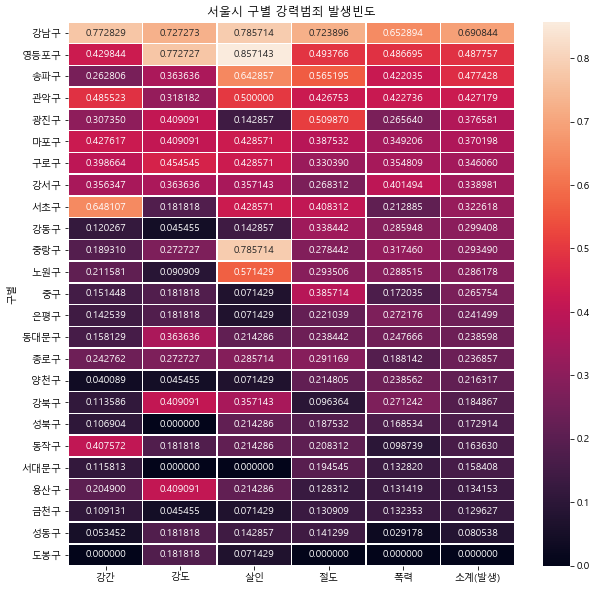

In [42]:
plt.figure(figsize = (10,10))
sns.heatmap(crime_count_norm.sort_values(by='소계(발생)', ascending=False), annot=True, fmt='f', linewidths=.5)
plt.title('서울시 구별 강력범죄 발생빈도')
plt.show()

## folium
python 라이브러리로 실제 지리학적 정보 시각화에 유용한 도구
프로젝트에서 사용된 json파일은 서울시 부분만 추려내었음.
json파일의 각 id가 위 pd.DataFrame의 index와 일치

In [49]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [53]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = 'C:/Users/ASIA-/00.sb/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = frame_by_gu['살인'],
               columns = [frame_by_gu.index, frame_by_gu['살인']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map